In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/uber.csv")

In [ ]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5.0


In [ ]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [ ]:
df=df.drop(['Unnamed: 0', 'key','pickup_datetime'],axis=1)

In [ ]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5.0


In [ ]:
df.isna()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
26777,False,False,False,False,False,False
26778,False,False,False,False,False,False
26779,False,False,False,False,False,False
26780,False,False,False,False,False,False


In [ ]:
df.dropna(inplace=True)

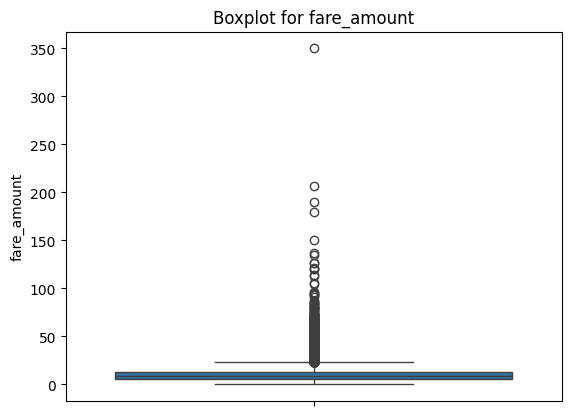

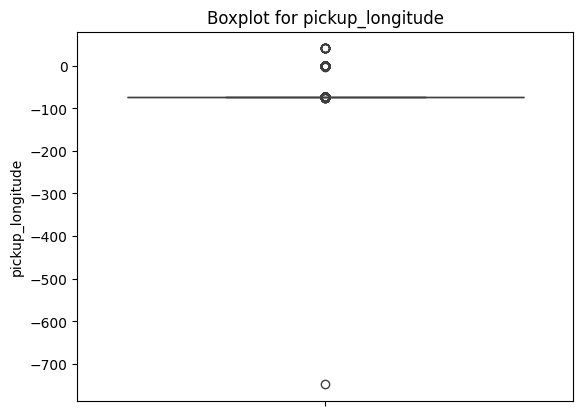

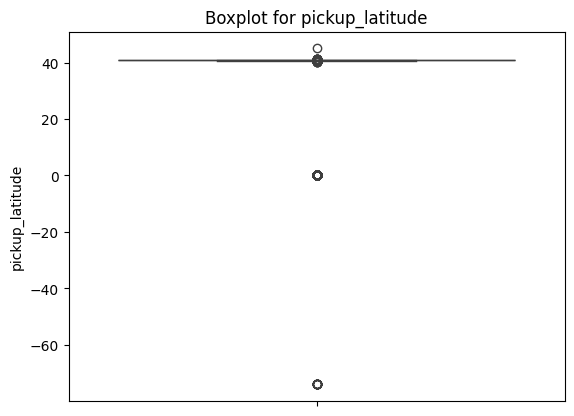

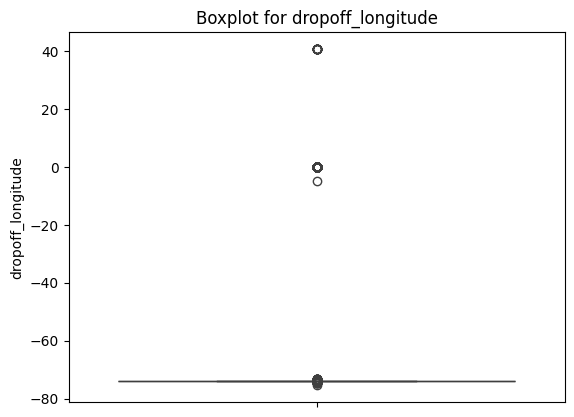

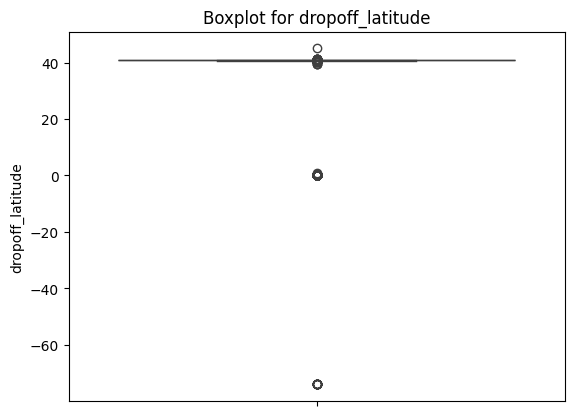

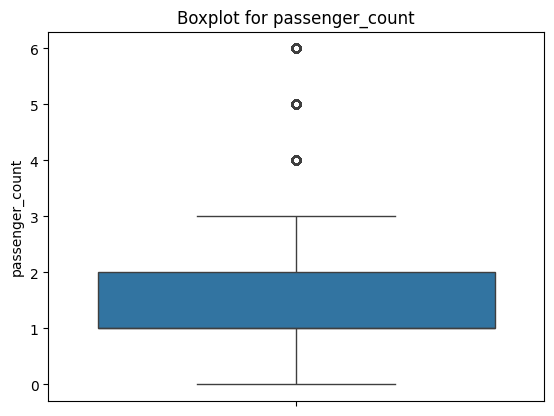

In [ ]:
for i in df.columns:
    sns.boxplot(data=df[i])
    plt.title(f'Boxplot for {i}')
    plt.show()

In [ ]:
print(df[i].unique())


[1. 3. 5. 2. 4. 6. 0.]


In [ ]:
df.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

<Axes: >

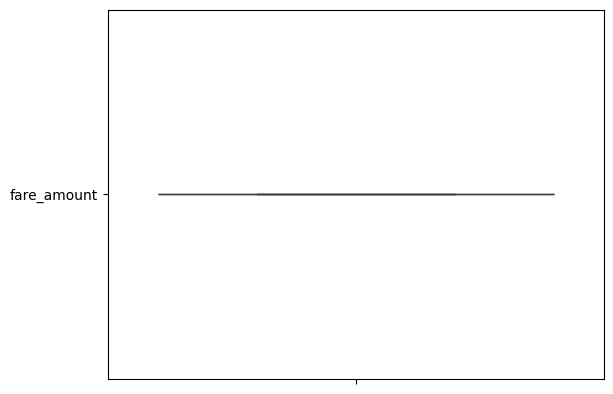

In [ ]:
sns.boxplot('fare_amount')

In [ ]:
x=df.drop('fare_amount',axis=1)

In [ ]:
y=df['fare_amount']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [ ]:
scaler.fit_transform(x)

array([[0.85449756, 0.96393615, 0.01162798, 0.96380739, 0.16666667],
       [0.85450448, 0.96385107, 0.01166931, 0.96403511, 0.16666667],
       [0.85449093, 0.96395645, 0.011946  , 0.96422262, 0.16666667],
       ...,
       [0.85450621, 0.96397394, 0.01185094, 0.96393786, 0.16666667],
       [0.85451988, 0.96420788, 0.01159199, 0.96398091, 0.83333333],
       [0.85451037, 0.96390282, 0.01151418, 0.9636471 , 0.16666667]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred =lr.predict(x_test)
y_pred[:5]

array([11.52914896, 11.34988639, 11.34724195, 11.34520797, 11.40301513])

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)

In [ ]:
rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)


In [ ]:
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 96.40138368828887
Root Mean Squared Error (RMSE): 9.818420631053085
R-squared (R²): 0.00042815180296496


In [ ]:
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 96.40138368828887
Root Mean Squared Error (RMSE): 9.818420631053085
R-squared (R²): 0.00042815180296496


In [ ]:
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred_rf)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)


NameError: name 'y_pred_rf' is not defined

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)


from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
y_pred_rf[:5]


mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred_rf)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)


Mean Squared Error (MSE): 96.40138368828887
Root Mean Squared Error (RMSE): 9.818420631053085
R-squared (R²): 0.00042815180296496
Mean Squared Error (MSE): 27.462128453259727
Root Mean Squared Error (RMSE): 5.24043208650391
R-squared (R²): 0.7152492065652378
